## Working with arrays

### Getting the data into a matrix

Before analyzing the data, we need to store it in the computer’s memory. Since the
data is of a homogeneous type (these are all numbers), it is natural to use a matrix as
a container.

In [28]:
aq = rand(Float64, (11, 9))*14

11×9 Matrix{Float64}:
 11.0983   13.4108    2.59585  12.161     …  12.257     11.4864    8.20261
 12.2991   13.3456    9.10354   0.977913     11.1365     2.15588   7.82385
  6.40516   4.15438  11.7597    1.09927       9.51187   13.5557    6.28267
  4.59096   4.0007   10.5588    3.7404        4.34437   10.9612    5.10538
 10.1014    5.13547  10.2253    8.92903       3.62145    1.17192  12.4403
 10.7323    6.4389    2.47537   9.14894   …   4.06553    9.44254   2.2252
  3.8471    3.49485   1.32054   8.35305       5.36904    1.61013   4.21223
  7.18692   3.7057    2.33526   5.54921       0.822981  11.1512    2.96317
  4.18247  10.394     6.83713   6.63886       9.07527    9.4176    6.69137
  8.08907  11.7575   12.7493    0.671882      5.30385    7.56462   4.68671
 13.679     7.35726   1.55444   1.7493    …  13.8031     1.09639  10.9873

in Julia, it is easy to
create a matrix storing predefined data. You just need to write each row of data as a
single line of the input, using whitespace as a separator of columns, and wrap every-
thing in square brackets.

In [32]:
x = [1 2 3 4 5 
    2 3 4 5 6]

2×5 Matrix{Int64}:
 1  2  3  4  5
 2  3  4  5  6

The size function can take either one argument, in which case it returns a tuple of
dimensions, or two arguments, where the second argument is the dimension that we
want to investigate (where 1 stands for rows and 2 stands for columns).In the head of the output of our operation in listing 4.1, we can see that the matrix
has 11 rows and eight columns. We can check this by using the size function:

In [36]:
size(aq)

(11, 9)

In [37]:
size(aq, 1)

11

In [38]:
size(aq, 2)

9

### WORKING WITH TUPLES

Before moving forward, let’s briefly discuss what a tuple is. You can think of it as a vec-
tor but with a fixed length and immutable. It is created using parentheses, while vec-
tors are created with square brackets. You can get elements of the tuple, as with
vectors, but you cannot set them, unlike with vectors, because tuples are immutable;

Tuples in Julia are similar to tuples in Python, and their type is Tuple.

#### Tuples vs. vectors
You might ask what the benefit is of using tuples instead of vectors. The consider-
ations are as follows.
Tuples are immutable, so if in your code you want to ensure that the user will not be
able to change them, they are safer to use.
Since tuples are immutable, they are faster, as the compiler does not have to use
dynamic memory allocation to work with them (in type-stable code) and is able to
know the types of variables stored in them even if they are heterogeneous (refer to
the Julia Manual, http://mng.bz/epPP, for a list of tips ensuring the performance of
Julia code).
As a downside, I do not recommend creating tuples that store a large number of ele-
ments (they are best suited to holding small collections). Large tuples may lead to
significant compilation time of your programs.

For more technically oriented readers, let me mention that in Julia, tuples are allo-
cated on the stack, and standard arrays are heap allocated. If you do not know these
memory allocation models, see http://mng.bz/o5a2. For working efficiently with
Julia, you do not need to know the details of how memory management is handled.
It’s enough to understand that heap allocation is slower than stack allocation. Addi-
tionally, heap allocation requires an additional process called garbage collection (GC) to
be run. GC is responsible for releasing the memory that has been heap allocated and
is not referenced anymore.

In [39]:
using BenchmarkTools

In [40]:
@benchmark (1, 2, 3)

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  1.493 ns … 14.933 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.821 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.790 ns ±  0.319 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

                                                 █        ▂   
  ▄▃▁▁▁▄▅▃▁▁▁▅▄▂▁▁▁▅█▄▁▁▁▂▅▄▂▁▁▁▂▅▄▂▁▁▁▁▃▆▄▂▁▁▁▁▃█▇▃▁▁▁▁▁▅█▅ ▃
  1.49 ns        Histogram: frequency by time        1.97 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [41]:
@benchmark [1, 2, 3]

BenchmarkTools.Trial: 10000 samples with 994 evaluations.
 Range (min … max):  26.626 ns …  3.446 μs  ┊ GC (min … max):  0.00% … 98.90%
 Time  (median):     27.935 ns              ┊ GC (median):     0.00%
 Time  (mean ± σ):   34.723 ns ± 88.961 ns  ┊ GC (mean ± σ):  10.27% ±  4.06%

  ▃█▅▄▃▂▂                                                     ▁
  ████████▇▆▇▆█▇█▇▆▅▆▆▆▆▆▆▆▅▆▆▆▅▆▅▅▄▆▆▆▆▆▆▆▇▆▆▅▆▆█▇█▇▅▅▆▆▆▅▄▄ █
  26.6 ns      Histogram: log(frequency) by time      72.1 ns <

 Memory estimate: 80 bytes, allocs estimate: 1.

You can see in
the Memory estimate section (marked with a rectangle) that creating a vector
requires one memory allocation, while creating a tuple does not lead to any alloca-
tions. Therefore, in the GC section (marked with a rounded rectangle), you can see
that when benchmarking the creation of a tuple, GC is never triggered, while when
benchmarking a vector, GC is occasionally run.

To wrap up the comparison of vectors and tuples, let’s discuss their construction when
you pass data of mixed types. When you construct a vector using square brackets, Julia
will try to promote all passed elements to a common type, while constructing a tuple
does not result in such a conversion.

In [42]:
(1, 2, "string")

(1, 2, "string")

In [43]:
[1, 2, "string"]

3-element Vector{Any}:
 1
 2
  "string"

### Computing basic statistics of the data stored in a matrix

In [44]:
using Statistics

In [49]:
mean(aq, dims=1)

1×9 Matrix{Float64}:
 8.3829  7.5632  6.50138  5.36535  9.46333  6.31842  7.21009  7.2376  6.51098

In [50]:
std(aq, dims=1)

1×9 Matrix{Float64}:
 3.42427  3.95196  4.51699  3.98714  …  3.90771  4.14646  4.78406  3.18444

Let’s discuss two alternative ways to compute the required statistics. Here is the
first one:

In [51]:
map(mean, eachcol(aq))

9-element Vector{Float64}:
 8.382897539203036
 7.563198545767233
 6.5013820319134945
 5.365354051582288
 9.463333830460135
 6.3184244794132205
 7.210094117913622
 7.237597086877191
 6.510975828940257

In [53]:
map(std, eachcol(aq))

9-element Vector{Float64}:
 3.4242720142097927
 3.9519624931873727
 4.516993852603389
 3.98713822937857
 3.6791894674359047
 3.907712493010446
 4.146456842527298
 4.784060155436407
 3.1844362037920204

As a reminder from chapter
2, note that we could have used the do-end notation with the map function like this:
    

In [55]:
map(eachcol(aq)) do col
mean(col)
end

9-element Vector{Float64}:
 8.382897539203036
 7.563198545767233
 6.5013820319134945
 5.365354051582288
 9.463333830460135
 6.3184244794132205
 7.210094117913622
 7.237597086877191
 6.510975828940257

Instead of using the map function, we could have used a comprehension to create
a vector by iterating columns of the aq matrix:

In [56]:
[mean(col) for col in eachcol(aq)]

9-element Vector{Float64}:
 8.382897539203036
 7.563198545767233
 6.5013820319134945
 5.365354051582288
 9.463333830460135
 6.3184244794132205
 7.210094117913622
 7.237597086877191
 6.510975828940257

In [57]:
[std(col) for col in eachcol(aq)]

9-element Vector{Float64}:
 3.4242720142097927
 3.9519624931873727
 4.516993852603389
 3.98713822937857
 3.6791894674359047
 3.907712493010446
 4.146456842527298
 4.784060155436407
 3.1844362037920204

Another difference is that com-
prehensions always produce arrays, while the map function can produce values of a
different type. Here is an example of taking the absolute value of several numbers
stored in a tuple. A comprehension produces a vector, while map returns a tuple:

In [58]:
x = (-2, -1, 0, 1, 2)

(-2, -1, 0, 1, 2)

In [59]:
[abs(s) for s in x]

5-element Vector{Int64}:
 2
 1
 0
 1
 2

In [61]:
map(abs, x)

(2, 1, 0, 1, 2)

## Indexing into arrays

Often you want to select part of a matrix to be able to work with it later. This is easily
done using indexing.

In [63]:
[mean(aq[:, i]) for i in axes(aq, 2)]

9-element Vector{Float64}:
 8.382897539203036
 7.563198545767233
 6.5013820319134945
 5.365354051582288
 9.463333830460135
 6.3184244794132205
 7.210094117913622
 7.237597086877191
 6.510975828940257

The axes function is similar to the
size function discussed previously. The difference is that instead of returning the
length of the given dimension, it produces a valid range of indices in a given dimen-
sion. In this example, it is as follows:

In [64]:
axes(aq, 2)

Base.OneTo(9)

In our comprehension, since we now iterate indices of the second dimension of our
matrix, we need to extract its single column. This is done using the aq[:, j] expres-
sion. The colon (:) means that we pick all rows of the j-th column of aq.

In [65]:
aq[:, 1]

11-element Vector{Float64}:
 11.098287101412001
 12.299148427485664
  6.405164366186594
  4.590961891832809
 10.101403748013208
 10.73230239989706
  3.8471018121148997
  7.186917034060474
  4.182472766022412
  8.08907182686122
 13.679041557347063

A final note related to the aq[:, j] expression is that it makes a copy of the j-th col-
umn of our matrix. Sometimes, for performance reasons, you might prefer not to
copy data, but use a view into the aq matrix instead. This can be done using the view
function or the @view macro as follows:

In [77]:
@benchmark [mean(view($aq, :, j)) for j in axes($aq, 2)]

BenchmarkTools.Trial: 10000 samples with 818 evaluations.
 Range (min … max):  149.544 ns …  2.490 μs  ┊ GC (min … max): 0.00% … 87.96%
 Time  (median):     153.143 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   172.993 ns ± 68.686 ns  ┊ GC (mean ± σ):  1.44% ±  4.08%

  ▅█▁▂▅▂▁▁  ▁     ▂                      ▁▂                    ▁
  ███████████████████▇▇█▇▇▇▆▆▇▇▇█▇▇▆▅▅▆▆▇██▅▆▇▆▆▇▇▇▆▅▅▅▄▅▅▅▅▆▆ █
  150 ns        Histogram: log(frequency) by time       332 ns <

 Memory estimate: 128 bytes, allocs estimate: 1.

In [78]:
@benchmark [mean(@view $aq[:, j]) for j in axes($aq, 2)]

BenchmarkTools.Trial: 10000 samples with 815 evaluations.
 Range (min … max):  151.514 ns …  1.877 μs  ┊ GC (min … max): 0.00% … 90.87%
 Time  (median):     162.616 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   176.681 ns ± 67.324 ns  ┊ GC (mean ± σ):  1.44% ±  4.07%

  █▁ █▄▃▁▁▁▁▁  ▁▁▂▁▁▁▁  ▁    ▁ ▁                               ▁
  ██▇████████████████████▇█▇▇████▇▇▇▇█▇▆▇▅▇▇▆▇▅▆▆▆▆▆▅▅▄▅▆▅▆▆▄▅ █
  152 ns        Histogram: log(frequency) by time       336 ns <

 Memory estimate: 128 bytes, allocs estimate: 1.

In the first example, when calculating the mean, we use the view function. In this
case, we pass the indices as consecutive arguments to it. When using the @view macro,
we can use the standard indexing syntax. I have shown this approach when calculating
the standard deviation. Apart from syntax differences, writing view(aq, :, j) and
@view aq[:, j] are equivalent.

### What is a view?
In Julia, if you have an array and create its view, no data from the parent array is cop-
ied. Instead, a lightweight object is created that lazily references the parent array.
Therefore, the parent and its view share the same memory to store data. If you modify
data stored in a view, this change is also visible in the parent.

In [79]:
@benchmark [mean($aq[:, i]) for i in axes($aq, 2)]

BenchmarkTools.Trial: 10000 samples with 197 evaluations.
 Range (min … max):  448.391 ns …   7.397 μs  ┊ GC (min … max): 0.00% … 88.79%
 Time  (median):     486.734 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   548.191 ns ± 374.818 ns  ┊ GC (mean ± σ):  4.94% ±  6.96%

  ▇▇▁█▄▂▁▁▁▂▁          ▁   ▁                                    ▁
  ███████████▇▇▆▆█▇█████▇▇▆█▇▇▆▅▆█▇█▆▆▆▆▆▆▇▇▆▅▅▆▆▅▇▇▇▅▄▆▇▇▆▆▅▆▇ █
  448 ns        Histogram: log(frequency) by time       1.13 μs <

 Memory estimate: 1.39 KiB, allocs estimate: 10.

In [81]:
@benchmark [mean(col) for col in eachcol($aq)]

BenchmarkTools.Trial: 10000 samples with 825 evaluations.
 Range (min … max):  149.181 ns …  2.336 μs  ┊ GC (min … max): 0.00% … 86.77%
 Time  (median):     152.427 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   166.003 ns ± 63.651 ns  ┊ GC (mean ± σ):  1.54% ±  4.13%

  ▄█▁ ▃▅ ▁ ▁   ▁      ▁                                        ▁
  ███▆██████▇▇██▇█▇▆███▇█▇▆▇▇▆▇▇▆▆▆▆▆▇▇▇▇▇▆▆▆▅▆▆▅▅▅▅▂▅▅▄▅▅▃▄▃▃ █
  149 ns        Histogram: log(frequency) by time       293 ns <

 Memory estimate: 128 bytes, allocs estimate: 1.

### Performance considerations of copying vs. making a view

Using view macro is preferable when we have a large dataset

In [83]:
x = ones(10^6, 10);

In [84]:
@benchmark [mean($x[:, i]) for i in axes(x, 2)]

BenchmarkTools.Trial: 292 samples with 1 evaluation.
 Range (min … max):  14.250 ms … 26.737 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     17.067 ms              ┊ GC (median):    4.37%
 Time  (mean ± σ):   17.155 ms ±  1.927 ms  ┊ GC (mean ± σ):  3.63% ± 2.68%

  ▁▂   ▁ ▁▁▆▆▅ ▁▁  ▁  █▁▇▃▁  ▁ ▃ ▁▂                            
  ██▇▄▅██████████▆█████████▄▅█▆████▆▇▄▇▆▃▄▃▁▃▄▃▁▁▄▁▄▃▁▃▃▄▁▁▁▅ ▄
  14.2 ms         Histogram: frequency by time        22.6 ms <

 Memory estimate: 76.29 MiB, allocs estimate: 24.

In [85]:
@benchmark [mean(@view $x[:, i]) for i in axes(x, 2)]

BenchmarkTools.Trial: 1091 samples with 1 evaluation.
 Range (min … max):  4.208 ms …   8.452 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     4.506 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   4.576 ms ± 341.506 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

      ▄▄▃▃█▅▂▂▃▂▁                                              
  ▅▆▇▇██████████████▆▆▆▅▇▅▄▁▅▄▆▁▄▅▅▄▅▄▁▅▁▅▄▁▅▁▁▁▁▄▁▁▄▄▁▁▁▄▁▁▄ █
  4.21 ms      Histogram: log(frequency) by time      6.25 ms <

 Memory estimate: 208 bytes, allocs estimate: 4.

### Calculating correlations between variables

We want to calculate the correlation of columns 1 and 2, 3 and 4, 5 and 6, and 7 and
8. Here is a simple approach using the cor function from the Statistics module:

In [89]:
size(aq)

(11, 9)

In [90]:
axes(aq, 2)

Base.OneTo(9)

In [91]:
[cor(aq[:, i], aq[:, i+1]) for i in 1:8]

8-element Vector{Float64}:
  0.4493893537184495
  0.11561852387051137
 -0.53414254359444
  0.46595543239187415
 -0.15110498023475766
 -0.05006863399864355
 -0.15872824696602464
 -0.5265509237502947

You’ve already learned about ranges of the form start:stop that
span all values starting from start and finishing at stop, inclusive, with step equal
to 1. The style start:step:stop is a generalization of this syntax, allowing you to
specify the step of the range via the parameter step

In [96]:
collect(1:2:30)'

1×15 adjoint(::Vector{Int64}) with eltype Int64:
 1  3  5  7  9  11  13  15  17  19  21  23  25  27  29

In [97]:
@benchmark [cor($aq[:, i], $aq[:, i+1]) for i in 1:8]

BenchmarkTools.Trial: 10000 samples with 17 evaluations.
 Range (min … max):  949.941 ns … 518.519 μs  ┊ GC (min … max): 0.00% … 99.77%
 Time  (median):       1.642 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):     1.681 μs ±   8.905 μs  ┊ GC (mean ± σ):  9.16% ±  1.73%

  ██▂▁             ▃▃▆▆▇▇▇▆▅▄▄▂▂▁▂▁▂▂▂▂▂▂▂▁                     ▃
  ████▅▃▅▅▄▃▅▄▄▅▅▁▅█████████████████████████▇▇▇▇▇▇█▇█▇▆▆▆▇▆▅▆▅▆ █
  950 ns        Histogram: log(frequency) by time       2.93 μs <

 Memory estimate: 2.38 KiB, allocs estimate: 17.

In [99]:
@benchmark [cor(@view($aq[:, i]), @view ($aq[:, i+1])) for i in 1:8]

BenchmarkTools.Trial: 10000 samples with 189 evaluations.
 Range (min … max):  511.942 ns …  49.037 μs  ┊ GC (min … max): 0.00% … 98.86%
 Time  (median):     573.976 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   612.469 ns ± 695.321 ns  ┊ GC (mean ± σ):  1.58% ±  1.40%

  ▆ ▆█▃▅█▄▂▂▁▁▁▂▁▁  ▁▁▁▁▁ ▁▁  ▁▁                                ▂
  █▃████████████████████████████▇▇▇▇▇▇▇▇█▇▇▇▇▆▆▇▇▆▆▆▅▆▅▆▄▇▆▄▄▄▆ █
  512 ns        Histogram: log(frequency) by time       1.15 μs <

 Memory estimate: 128 bytes, allocs estimate: 1.

### Fitting a linear regression

In [106]:
? \

search: \



```
\(x, y)
```

Left division operator: multiplication of `y` by the inverse of `x` on the left. Gives floating-point results for integer arguments.

# Examples

```jldoctest
julia> 3 \ 6
2.0

julia> inv(3) * 6
2.0

julia> A = [4 3; 2 1]; x = [5, 6];

julia> A \ x
2-element Vector{Float64}:
  6.5
 -7.0

julia> inv(A) * x
2-element Vector{Float64}:
  6.5
 -7.0
```

---

```
\(A, B)
```

Matrix division using a polyalgorithm. For input matrices `A` and `B`, the result `X` is such that `A*X == B` when `A` is square. The solver that is used depends upon the structure of `A`.  If `A` is upper or lower triangular (or diagonal), no factorization of `A` is required and the system is solved with either forward or backward substitution. For non-triangular square matrices, an LU factorization is used.

For rectangular `A` the result is the minimum-norm least squares solution computed by a pivoted QR factorization of `A` and a rank estimate of `A` based on the R factor.

When `A` is sparse, a similar polyalgorithm is used. For indefinite matrices, the `LDLt` factorization does not use pivoting during the numerical factorization and therefore the procedure can fail even for invertible matrices.

See also: [`factorize`](@ref), [`pinv`](@ref).

# Examples

```jldoctest
julia> A = [1 0; 1 -2]; B = [32; -4];

julia> X = A \ B
2-element Vector{Float64}:
 32.0
 18.0

julia> A * X == B
true
```

---

```
(\)(F::QRSparse, B::StridedVecOrMat)
```

Solve the least squares problem $\min\|Ax - b\|^2$ or the linear system of equations $Ax=b$ when `F` is the sparse QR factorization of $A$. A basic solution is returned when the problem is underdetermined.

# Examples

```jldoctest
julia> A = sparse([1,2,4], [1,1,1], [1.0,1.0,1.0], 4, 2)
4×2 SparseMatrixCSC{Float64, Int64} with 3 stored entries:
 1.0   ⋅
 1.0   ⋅
  ⋅    ⋅
 1.0   ⋅

julia> qr(A)\fill(1.0, 4)
2-element Vector{Float64}:
 1.0
 0.0
```


In [100]:
y = aq[:, 2];
x = [ones(11) aq[:, 1]];

11×2 Matrix{Float64}:
 1.0  11.0983
 1.0  12.2991
 1.0   6.40516
 1.0   4.59096
 1.0  10.1014
 1.0  10.7323
 1.0   3.8471
 1.0   7.18692
 1.0   4.18247
 1.0   8.08907
 1.0  13.679

---
Then the paramets are :

In [105]:
x\y

2-element Vector{Float64}:
 3.2154792649138364
 0.5186415866973291

In [110]:
size(aq)

(11, 9)

In [116]:
all_models = [aq[:, i+1]\[ones(11) aq[:, i]] for i in 1:2:(size(aq, 2)-1)]

4-element Vector{LinearAlgebra.Transpose{Float64, Vector{Float64}}}:
 [0.10592691176142088 0.9654049320261426]
 [0.12408573331349965 0.6044740009408164]
 [0.11743300454277374 1.074601288318723]
 [0.09888861633391233 0.6738862851885177]

In [117]:
function R²(x, y)
    X = [ones(11) x]
    model = X \ y
    prediction = X * model
    error = y - prediction
    SS_res = sum(v -> v ^ 2, error)
    mean_y = mean(y)
    SS_tot = sum(v -> (v - mean_y) ^ 2, y)
    return 1 - SS_res / SS_tot
end

R² (generic function with 1 method)

In [122]:
[R²( aq[:, i], aq[:, i+1]) for i in 1:2:(size(aq, 2)-1)]

4-element Vector{Float64}:
 0.20195079123548587
 0.28530825687753847
 0.022832715051746333
 0.025194656384907255

### Plotting the Anscombe’s quartet data

In [125]:
using Plots

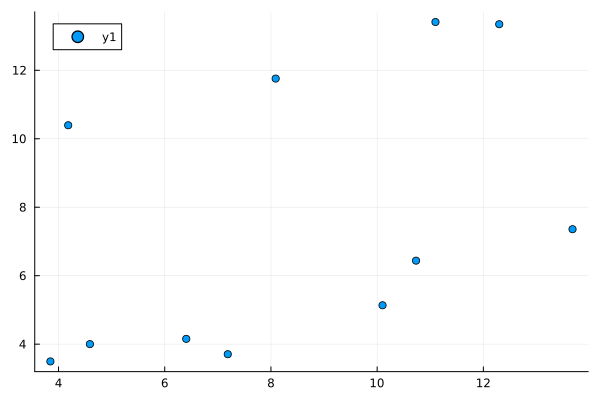

In [126]:
scatter(aq[:, 1], aq[:, 2])

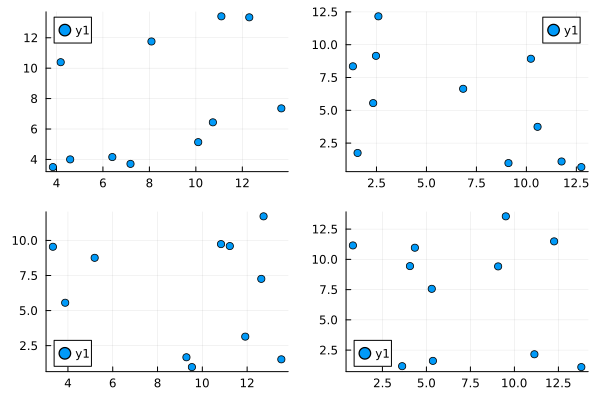

In [132]:
plot(scatter(aq[:, 1], aq[:, 2]),
scatter(aq[:, 3], aq[:, 4]),
scatter(aq[:, 5], aq[:, 6]),
scatter(aq[:, 7], aq[:, 8]))

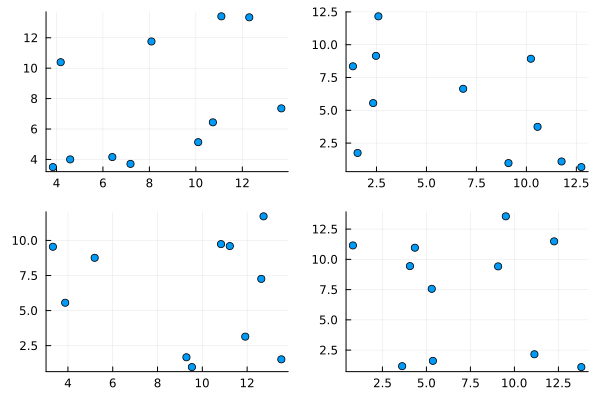

In [134]:
plot([scatter(aq[:, i], aq[:, i+1]; legend=false) for i in 1:2:7]...)

Observe, however, that we had to add one small detail. Since the plot function
accepts subplots as its consecutive positional arguments, we cannot just pass a vector
produced by our comprehension to it, as that would produce an error. We need to
expand the vector into multiple positional arguments in the function call. This opera-
tion, called splatting, is performed using the triple dots (...). In our code, they
directly follow the comprehension expression inside the function call.